## 1. Visualization technique
The techniques I applied are: <br>
- Line Charts<br>
- Combination Chart(scatter + regression line chart)<br>
- Auto-correlation chart

<font color=green> **Details about the technique:**  </font><br>
First, in order to understand the trend of the country's total CO2 emissions, I made a line chart of CO2 emissions from 1990 to 2015. <br>
The line chart was very easy to observe the trend of changes in data (CO2 emissions) over time and to compare data between countries. <br>
<br>
And for industrial structure analysis, I drew a scatter plot of GDP per capita and CO2 emission per capita on the x and y axes, respectively. <br>
To see the correlation between two variables. To show this, we also marked a regression line. <br>


I displayed an autocorrelation chart (I used the statsmodels package instead of using bokeh). <br>
At the same time, I tried to predict the CO2 emission emission by 2025 using Auto Regression (n=5) using dashed line chart. <br>
<font color=blue>*(It is connected and merged with the actual data)* <br></font> <br>



## 2. Visualization Library
**Bokeh**

<font color=green>**Reason to apply:**</font>  <br>
Bokeh supports interactive visualization, allowing you to enlarge and explore specific parts, and I think it is a very suitable package for expressing time series data. (The data I will be discussing here today is time series data.) Also, it can be saved as a picture, and I think it is a very useful package. Personally, I really like the hover function, try hovering the mouse pointer over a point in the scatter plot below. Communicating information interactively is awesome!

<font color=green>**Details on Bokeh:**</font><br>
Bokeh is a Python library for creating interactive visualizations for modern web browsers. It helps you build beautiful graphics, ranging from simple plots to complex dashboards with streaming datasets. With Bokeh, you can create JavaScript-powered visualizations without writing any JavaScript yourself.

<font color=green>**To install:**</font><br>
Go to the command line and type: <br>
$ pip install bokeh==2.4.3

# 3. Demonstration

<font color=green> **Visualization Purpose:**  </font><br>
I wanted to understand the industrial structure of Southeast Asia (SEA) through the CO2 emissions of each country. <br>
I assume that if a country is a manufacturing (secondary industry) oriented society, it can be inferred that CO2 emissions are high. <br>
  
For instance, in the case of Singapore, which is composed mainly of tertiary industries such as services and finance, <br>
there is a negative correlation that CO2 emission decreases as GDP increases. <br>
(FYI, Of course, Singapore started the COE system in 1990, limiting the number of cars. However, this system is a system that limits the total amount of automobiles in the city, and although it may affect the difference in CO2 emissions before and after 1990, the continued decrease in CO2 emissions after 1990 cannot be explained.)<br>
  
On the other hand, in Malaysia, where manufacturing is the center, there is a positive correlation between GDP and CO2 emission. <br>
  
*(Of course, as GDP increases, the number of vehicles in a country increases, which could also affect CO2 emissions. In addition, an increase in population may lead to an increase in CO2 emissions.)* <br>
*(In order to exclude these factors, in the second half, we tried to exclude variables as much as possible using CO2 per capita and GDP per capita.)* <br>
<font color=blue> *(All the data was downloaded from WorldBank)* </font> <br>

## Package Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.models import ColumnDataSource, Range1d, LinearAxis, FixedTicker
from bokeh.plotting import figure, show, output_notebook
from bokeh.models.tools import HoverTool
from sklearn.linear_model import LinearRegression


## Loading the data(CO2 emission, GDP, population) in Southeast Asia countries

In [2]:
### Load the SEA data (CO2, GDP, POP)
with open('assets/CO2_SEA.csv', 'r') as f:
    df_co2 = pd.read_csv(f, sep=',', header=2, parse_dates=True)
    df_co2_all= df_co2.set_index('Country Name').iloc[:, 4:].T
    
with open('assets/GDP_SEA.csv', 'r') as f:
    df_gdp = pd.read_csv(f, sep=',', header=2, parse_dates=True)
    df_gdp_all = df_gdp.set_index('Country Name').iloc[:, 4:].T
    
with open('assets/POP_SEA.csv', 'r') as f:
    df_pop = pd.read_csv(f, sep=',', header=2, parse_dates=True)
    df_pop_all = df_pop.set_index('Country Name').iloc[:, 4:].T
    
    
df_co2_SEA = df_co2_all[['Vietnam', 'Malaysia', 'Indonesia', 'Thailand', 'Philippines', 'Cambodia', 'Singapore']]
df_gdp_SEA = df_gdp_all[['Vietnam', 'Malaysia', 'Indonesia', 'Thailand', 'Philippines', 'Cambodia', 'Singapore']]
df_pop_SEA = df_pop_all[['Vietnam', 'Malaysia', 'Indonesia', 'Thailand', 'Philippines', 'Cambodia', 'Singapore']]

df_co2_SEA = df_co2_SEA.loc['1990':'2015'].reset_index().rename(columns={'index': 'Year'})
df_gdp_SEA = df_gdp_SEA.loc['1990':'2015'].reset_index().rename(columns={'index': 'Year'})
df_pop_SEA = df_pop_SEA.loc['1990':'2015'].reset_index().rename(columns={'index': 'Year'})

df_co2_SEA['Year'] = pd.to_datetime(df_co2_SEA['Year'], format='%Y')
df_gdp_SEA['Year'] = pd.to_datetime(df_gdp_SEA['Year'], format='%Y')
df_pop_SEA['Year'] = pd.to_datetime(df_pop_SEA['Year'], format='%Y')

## Making a line chart to see the CO2 emission trend per countries

In [3]:
### 1. line plot for CO2 emission data in SEA
lst_countries = ['Singapore', 'Malaysia', 'Thailand', 'Indonesia', 'Philippines', 'Cambodia', 'Vietnam']

### Make line plot of CO2 emissions for all countries in SEA
source = ColumnDataSource(df_co2_SEA)
co2 = figure(x_axis_type='datetime', plot_width=800, plot_height=400)

# co2.multi_line(xs=[df_co2_SEA.index]*len(df_co2_SEA.columns), ys=[df_co2_SEA[col] for col in df_co2_SEA.columns], 
#                line_color=['blue', 'red', 'green', 'yellow', 'black', 'purple', 'orange'], 
#                line_width=2)
for col in lst_countries:    
    if col in ['Singapore', 'Malaysia']:
        co2.line(x='Year', y=col, source=source, line_width=2, 
                line_color=['blue', 'red', 'green', 'yellow', 'black', 'purple', 'orange'][lst_countries.index(col)],
                legend_label=col)
    else:
        co2.line(x='Year', y=col, source=source, line_width=2, 
                line_color=['blue', 'red', 'green', 'yellow', 'black', 'purple', 'orange'][lst_countries.index(col)],
                legend_label=col, alpha=0.5)
        
co2.title.text = 'CO2 emissions in SEA'
co2.xaxis.axis_label = 'Year (1990-2015)'
co2.yaxis.axis_label = 'CO2 emmissions (metric tons)'
        
output_notebook()

show(co2)

Loading BokehJS ...

Well, most countries have reduced their CO2 emissions since 1990, but I've noticed a trend in Singapore's emissions going down! Then, let's take a closer look at the case of Malaysia, where the trend of increase is the most obvious among countries where CO2 emissions are increasing.

## Loading Malaysia Only Data and Adding CO2 emission per capita and GDP per capita columns

In [4]:
### Make 3 df of Malaysia (CO2, GDP, POP)
df_co2_mala = pd.DataFrame(df_co2_SEA.set_index('Year')['Malaysia']).rename(columns={'Malaysia':'CO2'})
df_gdp_mala = pd.DataFrame(df_gdp_SEA.set_index('Year')['Malaysia']).rename(columns={'Malaysia':'GDP'})
df_pop_mala = pd.DataFrame(df_pop_SEA.set_index('Year')['Malaysia']).rename(columns={'Malaysia':'POP'})

### Concatenate 3 df into 1 df
df_mala = pd.concat([df_co2_mala, df_gdp_mala, df_pop_mala], axis=1)

### Calculate the per capita CO2 emissions
df_mala['CO2_per_capita'] = df_mala['CO2'] / df_mala['POP']

### Calculate the per capita GDP
df_mala['GDP_per_capita'] = df_mala['GDP'] / df_mala['POP']


## Plotting the line chart of CO2 emission per capita and GDP per capita to check the correlation between them

In [5]:
### Make a line plot of CO2 emissions per capita in Malaysia
source = ColumnDataSource(df_mala)

co2_gdp = figure(x_axis_type='datetime', plot_width=800, plot_height=400)
co2_gdp.title.text = 'CO2 emissions per capita in Malaysia'
co2_gdp.xaxis.axis_label = 'Year (1990-2015)'
co2_gdp.yaxis.axis_label = 'CO2 emmissions per capita (metric tons)'

co2_gdp.y_range = Range1d(start=0, end=0.0000005)
co2_gdp.line(x='Year', y='CO2_per_capita', source=source, line_width=2, line_color='orange', legend_label='CO2 per capita')

### Make a line plot of GDP per capita in Malaysia
co2_gdp.extra_y_ranges = {'extra': Range1d(start=0, end=0.001)}
co2_gdp.add_layout(LinearAxis(y_range_name='extra', axis_label='GDP per capita'), 'right')
co2_gdp.line(x='Year', y='GDP_per_capita', source=source, color='green', line_width=2, legend='GDP per capita', y_range_name='extra')

show(co2_gdp)


The CO2 emission per capita data for Malaysia and the GDP emission per capita are exactly the same with increasing and decreasing trends! It can be said that the output of manufacturing complexes centered on Penang and Kulim in Malaysia is the trend of GDP growth. That is why GDP is similar to the flow of changes in CO2 emission.

## Plotting the scatter chart (GDP per capita, CO2 per capita) and making a linear regression line chart

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d

There seems to be a correlation between GDP and CO2 emission through the scatter plot. Let's mark the linear regression line.

In [7]:
### Make Linear Regression Model for CO2 emissions per capita in Malaysia
X = df_mala['GDP_per_capita'].values.reshape(-1, 1)
y = df_mala['CO2_per_capita'].values.reshape(-1, 1)

model = LinearRegression().fit(X, y)
coefficients = model.coef_
intercept = model.intercept_
linear_model = model.predict(X)
print('The linear regression model is: y = {}x + {}'.format(coefficients[0][0], intercept[0]))

### Make scatter plot of CO2 per capita vs GDP per capita
sct = figure(plot_width=800, plot_height=400)
sct.scatter(x='GDP_per_capita', y='CO2_per_capita', source=source, color='blue', legend_label='Data')
sct.line(x=X[:,0], y=linear_model[:,0], line_width=2, line_color='orange', legend_label='Linear Regression Model')
sct.title.text = 'Correlation between CO2 per capita and GDP per capita'
sct.xaxis.axis_label = 'GDP per capita'
sct.yaxis.axis_label = 'CO2 per capita'

hover = HoverTool()
hover.tooltips = [
    ('GDP per capita', '@GDP_per_capita'),
    ('CO2 per capita', '@CO2_per_capita')
]

sct.add_tools(hover)

show(sct)

The linear regression model is: y = 0.00024682587366185423x + 1.7372116084059038e-07


Hmm, looking at the scatter plot and line together, I think this data is more suitable for a quadratic or cubic model. I'll give it a try.

In [8]:
degree=2
model_2 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_2.fit(X, y)
quad_model = model_2.predict(X)
print('The quadratic regression model is: y = {}x^2 + {}x + {}'.format(model_2.steps[1][1].coef_[0][2], model_2.steps[1][1].coef_[0][1], model_2.steps[1][1].coef_[0][0]))

degree=3
model_3 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_3.fit(X, y)
cubic_model = model_3.predict(X)
print('The cubic regression model is: y = {}x^3 + {}x^2 + {}x + {}'.format(model_3.steps[1][1].coef_[0][3], model_3.steps[1][1].coef_[0][2], model_3.steps[1][1].coef_[0][1], model_3.steps[1][1].coef_[0][0]))

pp = figure(plot_width=800, plot_height=400)
pp.scatter(x='GDP_per_capita', y='CO2_per_capita', source=source, color='blue', legend_label='Data')
pp.line(x=X[:,0], y=linear_model[:,0], line_width=2, line_color='orange', legend_label='Linear Regression Model')
pp.line(x=X[:,0], y=quad_model[:,0], line_width=2, line_color='green', legend_label='Quadratic Regression Model')
pp.line(x=X[:,0], y=cubic_model[:,0], line_width=2, line_color='red', legend_label='Cubic Regression Model')
pp.title.text = 'Correlation between CO2 per capita and GDP per capita'
pp.xaxis.axis_label = 'GDP per capita'
pp.yaxis.axis_label = 'CO2 per capita'
show(pp)

The quadratic regression model is: y = -1.8607373568468284x^2 + 0.0012103127638880581x + 0.0
The cubic regression model is: y = 2954.747466355156x^3 + -4.123637641430063x^2 + 0.0017568582174247607x + 0.0


That's great! As expected, we found that the quadratic and cubic models are much better than the linear ones. Now let's evaluate the model numerically with the root mean squared error (RMSE).

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
### Evaluate the performance of the models
print('The mean squared error of the linear model is: {}'.format(mean_squared_error(y, linear_model)))
print('The mean squared error of the quadratic model is: {}'.format(mean_squared_error(y, quad_model)))
print('The mean squared error of the cubic model is: {}'.format(mean_squared_error(y, cubic_model)))

The mean squared error of the linear model is: 3.57644645322275e-16
The mean squared error of the quadratic model is: 2.7832709588190173e-16
The mean squared error of the cubic model is: 2.7753612314157626e-16


There is really no significant difference between the quadratic and cubic models. Since the cubic model can be overfitting, we can conclude that the quadratic model is sufficient.

In [11]:
# ### Check the performance with residuals
# linear_residuals = y - linear_model
# quad_residuals = y - quad_model
# cubic_residuals = y - cubic_model

# ### make x values for the residuals
# x = np.linspace(0, 0.001, 26)

# residuals = figure(plot_width=800, plot_height=400)
# residuals.scatter(x=x, y=linear_residuals[:,0], color='orange', legend_label='Linear Model Residuals')
# residuals.scatter(x=x, y=quad_residuals[:,0], color='green', legend_label='Quadratic Model Residuals')
# residuals.scatter(x=x, y=cubic_residuals[:,0], color='red', legend_label='Cubic Model Residuals')
# residuals.title.text = 'Residuals of the models'
# residuals.xaxis.axis_label = 'GDP per capita'
# residuals.yaxis.axis_label = 'Residuals'
# show(residuals)


## Loading Singapore Only Data and Adding CO2 emission per capita and GDP per capita columns

In [12]:
### Make 3 df of Singapore (CO2, GDP, POP)
df_co2_sing = pd.DataFrame(df_co2_SEA.set_index('Year')['Singapore']).rename(columns={'Singapore':'CO2'})
df_gdp_sing = pd.DataFrame(df_gdp_SEA.set_index('Year')['Singapore']).rename(columns={'Singapore':'GDP'})
df_pop_sing = pd.DataFrame(df_pop_SEA.set_index('Year')['Singapore']).rename(columns={'Singapore':'POP'})

### Concatenate 3 df into 1 df
df_sing = pd.concat([df_co2_sing, df_gdp_sing, df_pop_sing], axis=1)

### Calculate the per capita CO2 emissions
df_sing['CO2_per_capita'] = df_sing['CO2'] / df_sing['POP']

### Calculate the per capita GDP
df_sing['GDP_per_capita'] = df_sing['GDP'] / df_sing['POP']


## Plotting the line chart of CO2 emission per capita and GDP per capita to check the correlation between them

In [13]:
### Make a line plot of CO2 emissions per capita in Singapore
source = ColumnDataSource(df_sing)

co2_gdp = figure(x_axis_type='datetime', plot_width=800, plot_height=400)
co2_gdp.title.text = 'CO2 emissions per capita in Singapore'
co2_gdp.xaxis.axis_label = 'Year (1990-2015)'
co2_gdp.yaxis.axis_label = 'CO2 emmissions per capita (metric tons)'

co2_gdp.y_range = Range1d(start=0, end=0.000005)
co2_gdp.line(x='Year', y='CO2_per_capita', source=source, line_width=2, line_color='blue', legend_label='CO2 per capita')

### Make a line plot of GDP per capita in Singapore
co2_gdp.extra_y_ranges = {'extra': Range1d(start=0, end=0.02)}
co2_gdp.add_layout(LinearAxis(y_range_name='extra', axis_label='GDP per capita'), 'right')
co2_gdp.line(x='Year', y='GDP_per_capita', source=source, color='red', line_width=2, legend='GDP per capita', y_range_name='extra')

show(co2_gdp)


Unlike Malaysia, Singapore shows an inverse correlation between CO2 emission and GDP. As a service- and finance-oriented value-creating society, Singapore is exactly the opposite of Malaysia. (As explained above, COE, the right to own a vehicle, has been in effect since 1990, and although it temporarily contributed to the reduction of CO2 emission, it can be concluded that the continuous decrease in the future is due to the social-industrial structure.)

## Plotting the scatter chart (GDP per capita, CO2 per capita) and making a linear regression line chart

In [14]:
### Make Linear Regression Model for CO2 emissions per capita in Singapore
X = df_sing['GDP_per_capita'].values.reshape(-1, 1)
y = df_sing['CO2_per_capita'].values.reshape(-1, 1)

model = LinearRegression().fit(X, y)
coefficients = model.coef_
print(coefficients)
intercept = model.intercept_
linear_model = model.predict(X)
print('The linear regression model is: y = {}x + {}'.format(coefficients[0][0], intercept[0]))

### Make scatter plot of CO2 per capita vs GDP per capita
sct = figure(plot_width=800, plot_height=400)
sct.scatter(x='GDP_per_capita', y='CO2_per_capita', source=source, color='blue', legend_label='Data')
sct.line(x=X[:,0], y=linear_model[:,0], line_width=2, line_color='orange', legend_label='Linear Regression Model')
sct.title.text = 'Correlation between CO2 per capita and GDP per capita'
sct.xaxis.axis_label = 'GDP per capita'
sct.yaxis.axis_label = 'CO2 per capita'

hover = HoverTool()
hover.tooltips = [
    ('GDP per capita', '@GDP_per_capita'),
    ('CO2 per capita', '@CO2_per_capita')
]

sct.add_tools(hover)

show(sct)

[[-0.00025044]]
The linear regression model is: y = -0.0002504421101671916x + 4.0855589600711776e-06


Wow! Scatter plots and linear models show that they also show an inverse correlation. Shall we fit only the quadratic model like in Malaysia?

In [15]:
### Make Quadratic Regression Model for CO2 emissions per capita in Singapore
X = df_sing['GDP_per_capita'].values.reshape(-1, 1)
y = df_sing['CO2_per_capita'].values.reshape(-1, 1)

degree = 2
model_2 = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_2.fit(X, y)
quad_model = model_2.predict(X)
print('The quadratic regression model is: y = {}x^2 + {}x + {}'.format(model_2.steps[1][1].coef_[0][2], model_2.steps[1][1].coef_[0][1], model_2.steps[1][1].intercept_[0]))

### Make scatter plot of CO2 per capita vs GDP per capita
sct = figure(plot_width=800, plot_height=400)
sct.scatter(x='GDP_per_capita', y='CO2_per_capita', source=source, color='blue', legend_label='Data')
sct.line(x=X[:,0], y=linear_model[:,0], line_width=2, line_color='orange', legend_label='Linear Regression Model')
sct.line(x=X[:,0], y=quad_model[:,0], line_width=2, line_color='green', legend_label='Quadratic Regression Model')
sct.title.text = 'Correlation between CO2 per capita and GDP per capita'
sct.xaxis.axis_label = 'GDP per capita'
sct.yaxis.axis_label = 'CO2 per capita'

hover = HoverTool()
hover.tooltips = [
    ('GDP per capita', '@GDP_per_capita'),
    ('CO2 per capita', '@CO2_per_capita')
]

sct.add_tools(hover)

show(sct)


The quadratic regression model is: y = 0.00308204402384666x^2 + -0.0002972468698183287x + 4.250618518544883e-06


This time, we visually confirmed that there is little difference between the linear model and the quadratic model. Let's not try to find a significant difference in the RMSE.

### Plotting auto-correlation chart of Singapore's CO2 emission data with statsmodels package

I will try to figure out the auto-correlation of Singapore data and even try to predict the CO2 emission emission through autoregression.

In [16]:
### Make 3 df of Singapore (CO2, GDP, POP)
df_co2_sing = pd.DataFrame(df_co2_SEA.set_index('Year')['Singapore']).rename(columns={'Singapore':'CO2'})
df_gdp_sing = pd.DataFrame(df_gdp_SEA.set_index('Year')['Singapore']).rename(columns={'Singapore':'GDP'})
df_pop_sing = pd.DataFrame(df_pop_SEA.set_index('Year')['Singapore']).rename(columns={'Singapore':'POP'})

### Concatenate 3 df into 1 df
df_sing = pd.concat([df_co2_sing, df_gdp_sing, df_pop_sing], axis=1)

### Calculate the per capita CO2 emissions
df_sing['CO2_per_capita'] = df_sing['CO2'] / df_sing['POP']

### Calculate the per capita GDP
df_sing['GDP_per_capita'] = df_sing['GDP'] / df_sing['POP']


In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.ar_model import AutoReg

In [18]:
### Add 't' column to df_sing
df_sing['t'] = np.arange(1, len(df_sing)+1)

The linear regression model is: y = -0.1087278842003077x + 10.74793883372805


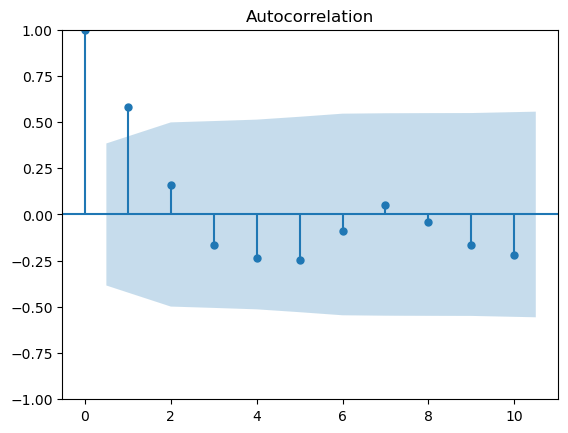

/Users/jacob/opt/anaconda3/envs/SIADS/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


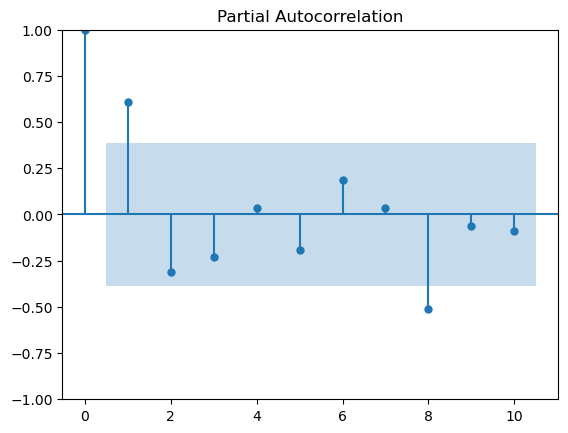

In [19]:
### Make a linear regression model for CO2 emission in Singapore
X = df_sing['t'].values.reshape(-1, 1)
y = df_sing['CO2'].values.reshape(-1, 1)

model = LinearRegression().fit(X, y)
coefficients = model.coef_
intercept = model.intercept_
linear_model = model.predict(X)
print('The linear regression model is: y = {}x + {}'.format(coefficients[0][0], intercept[0]))

### Make remaining CO2 emission in Singapore
remaining = df_sing['CO2'] - linear_model[:,0]

### Make autocorrelation plot of remaining CO2 emission in Singapore
plot_acf(remaining, lags=10)
plt.show()
plot_pacf(remaining, lags=10)
plt.show()

Since the data has some autocorrelation, the auto-regression performed later is somewhat unreliable, but I hope it will be used as a reference.

In [20]:
### Make predictions using AR(2) model by t=30
n = 4
model = AutoReg(df_sing['CO2'], lags=n)
model_fit = model.fit()
coef = model_fit.params
predictions = model_fit.predict(start=len(remaining), end=len(remaining)+10)
pred_index = np.arange(len(remaining), len(remaining)+11)


### Make a Bokeh plot of CO2 emission prediction in Singapore
source = ColumnDataSource(df_sing)

co2_pred = figure(plot_width=800, plot_height=400)
co2_pred.title.text = 'CO2 emission prediction in Singapore with AR(5) model'
co2_pred.xaxis.axis_label = 'Year (1990-2025)'
# co2_pred.xaxis.ticker=[1990, 2000, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100]
co2_pred.xaxis.major_label_overrides = {0:'1990', 5:'1995', 10:'2000', 15:'2005', 20:'2010', 25:'2015', 30:'2020', 35:'2025'}
co2_pred.yaxis.axis_label = 'CO2 emmissions (metric tons)'
co2_pred.line(x='t', y='CO2', source=source, line_width=2, line_color='blue', legend_label='CO2 emission')
co2_pred.line(x=pred_index, y=predictions, line_width=2, line_dash='dashed', line_color='blue', legend_label='CO2 emission prediction with AR model')

show(co2_pred)

/Users/jacob/opt/anaconda3/envs/SIADS/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/jacob/opt/anaconda3/envs/SIADS/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
